# **Exploring NYC Public School Test Result Scores**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://raw.githubusercontent.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/main/__Projects__/11_Project_Exploring-NYC-Public-School-Test-Result-Scores/schools.csv'

# Read the CSV file into a DataFrame
df_schools = pd.read_csv(data_url)
display(df_schools)

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


## **Pandas Analysis**

In [3]:
# Get information about the DataFrame
df_schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [4]:
# Summary statistics for numeric columns
df_schools.describe()

,average_math,average_reading,average_writing,percent_tested
count,375.000000,375.000000,375.000000,355.000000
mean,432.944000,424.504000,418.458667,64.976338
std,71.952373,61.881069,64.548599,18.747634
min,317.000000,302.000000,284.000000,18.500000
25%,386.000000,386.000000,382.000000,50.950000
50%,415.000000,413.000000,403.000000,64.800000
75%,458.500000,445.000000,437.500000,79.600000
max,754.000000,697.000000,693.000000,100.000000


**Befor**

In [5]:
# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_schools.shape[0]}")
print(f"Number of columns: {df_schools.shape[1]}")

Number of rows: 375
Number of columns: 7


In [6]:
# Check for missing values
missing_values = df_schools.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
school_name         0
borough             0
building_code       0
average_math        0
average_reading     0
average_writing     0
percent_tested     20
dtype: int64


In [7]:
# Fill missing values (e.g., with mean or median)
# df_schools.fillna(df_schools.mean(), inplace=True)

In [8]:
# Alternatively, drop rows with missing values
df_schools.dropna(inplace=True)

**After**

In [9]:
# Check for missing values
missing_values = df_schools.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_schools.shape[0]}")
print(f"Number of columns: {df_schools.shape[1]}")

Missing values per column:
school_name        0
borough            0
building_code      0
average_math       0
average_reading    0
average_writing    0
percent_tested     0
dtype: int64
Number of rows: 355
Number of columns: 7


In [10]:
# Check data types of columns
print("Data types of columns:")
print(df_schools.dtypes)

Data types of columns:
school_name         object
borough             object
building_code       object
average_math         int64
average_reading      int64
average_writing      int64
percent_tested     float64
dtype: object


In [11]:
# Remove duplicates (if any)
df_schools.drop_duplicates(inplace=True)

# Dimensions of the DataFrame (rows, columns)
print(f"Number of rows: {df_schools.shape[0]}")
print(f"Number of columns: {df_schools.shape[1]}")

Number of rows: 355
Number of columns: 7


## **Matplotlib Visualization**

### borough

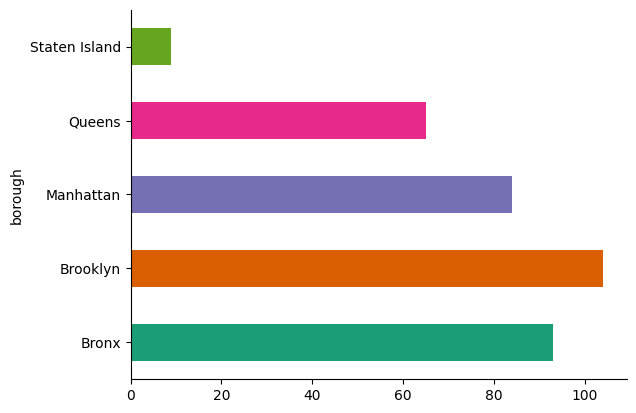

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

df_schools.groupby('borough').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Subject-wise Performance Comparison (Box Plot)

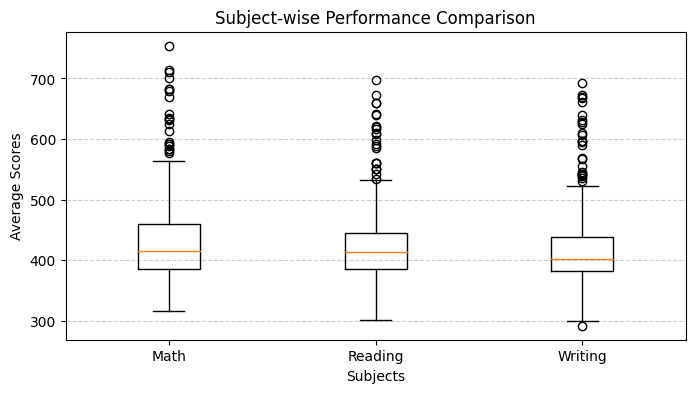

In [13]:
plt.figure(figsize=(8, 4))
subjects = ['average_math', 'average_reading', 'average_writing']
subject_labels = ['Math', 'Reading', 'Writing']
plt.boxplot([df_schools[subj] for subj in subjects], labels=subject_labels)
plt.xlabel('Subjects')
plt.ylabel('Average Scores')
plt.title('Subject-wise Performance Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### Correlation Heatmap

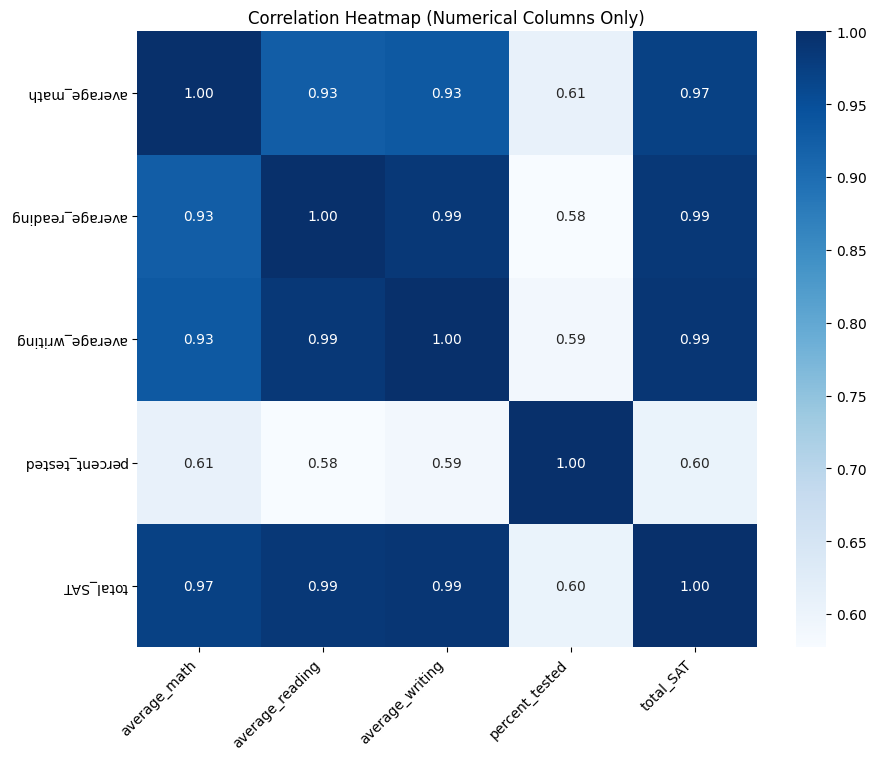

In [14]:
# Calculate the total SAT score by summing the scores across the three sections
df_schools['total_SAT'] = df_schools['average_math'] + df_schools['average_reading'] + df_schools['average_writing']

# Select numerical columns for correlation analysis
numerical_columns = ['average_math', 'average_reading', 'average_writing', 'percent_tested', 'total_SAT']
corr = df_schools[numerical_columns].corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")

# Rotate x-axis labels to 45 degrees
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Rotate y-axis labels to 180 degrees
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=180)

plt.title('Correlation Heatmap (Numerical Columns Only)')
plt.show()

### Distribution of Percentage of Students Tested (Histogram)

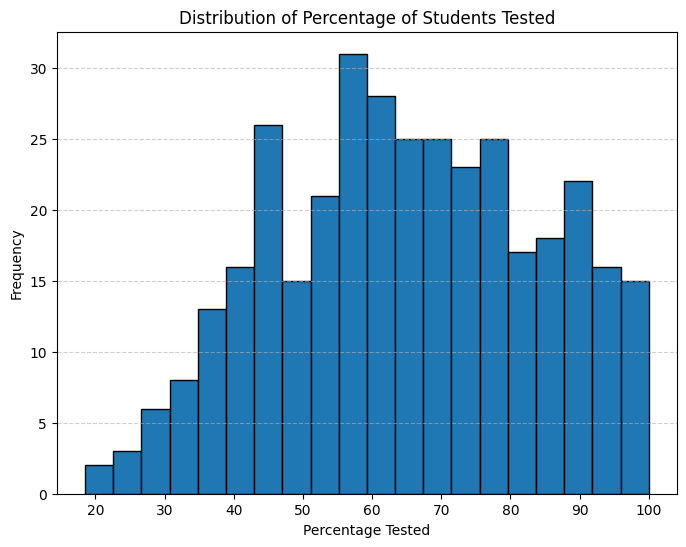

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(df_schools['percent_tested'], bins=20, edgecolor='black')
plt.xlabel('Percentage Tested')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage of Students Tested')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Average Total SAT Scores by Borough (Bar Chart)

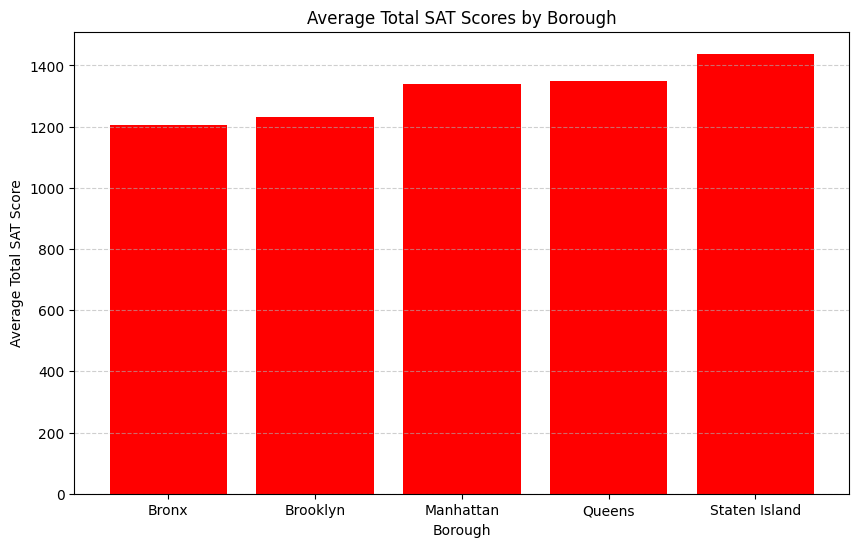

In [16]:
plt.figure(figsize=(10, 6))
plt.bar(df_schools.groupby('borough')['total_SAT'].mean().index, df_schools.groupby('borough')['total_SAT'].mean(), color='red')
plt.xlabel('Borough')
plt.ylabel('Average Total SAT Score')
plt.title('Average Total SAT Scores by Borough')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Plotting Top Math-Performing Schools

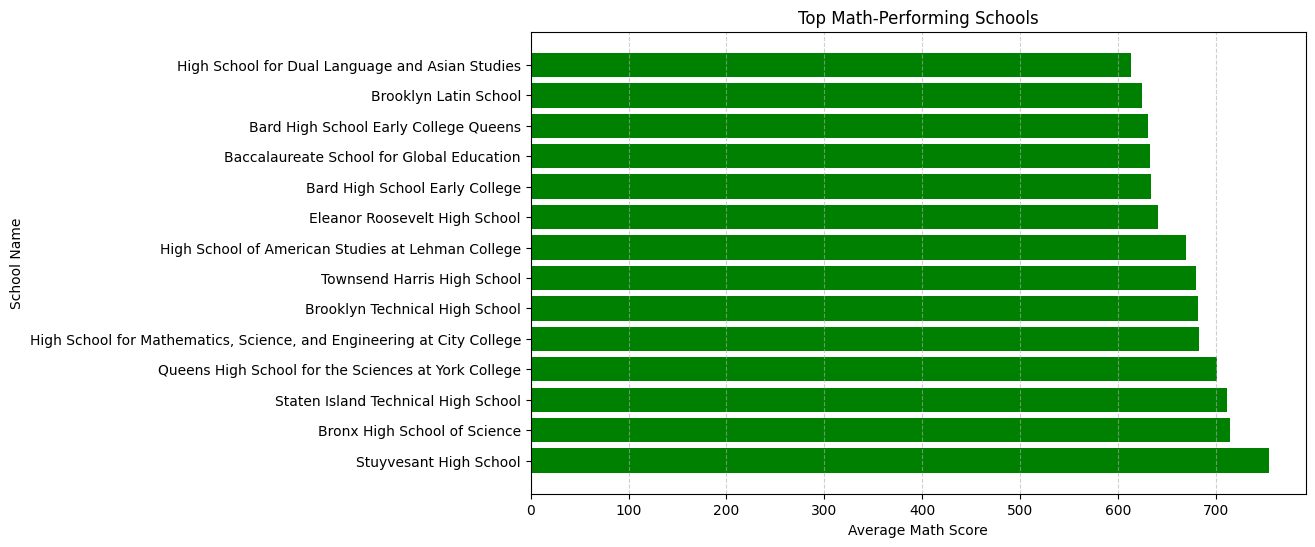

In [17]:
# Filter schools with average_math scores at least 80% of the maximum score
best_math_schools = df_schools[df_schools['average_math'] >= 0.8 * df_schools['average_math'].max()]

# Calculate the total SAT score by summing the scores across the three sections
df_schools['total_SAT'] = df_schools['average_math'] + df_schools['average_reading'] + df_schools['average_writing']

# Select columns 'school_name' and 'average_math'
best_math_schools = best_math_schools[['school_name', 'average_math']]

# Sort the DataFrame by 'average_math' in descending order
best_math_schools = best_math_schools.sort_values(by='average_math', ascending=False)

# Plotting top math-performing schools
plt.figure(figsize=(10, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='green')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Top Math-Performing Schools')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

### Plotting Top 10 Performing Schools based on Total SAT Scores

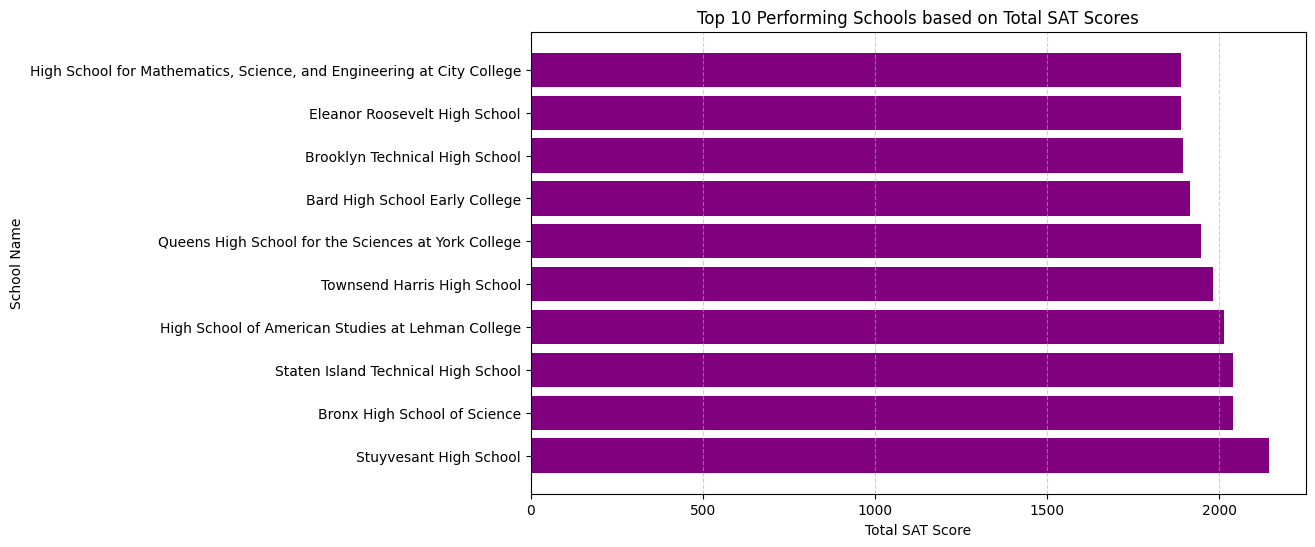

In [18]:
# Select columns 'school_name' and 'total_SAT'
top_10_schools = df_schools[['school_name', 'total_SAT']]

# Sort the DataFrame by 'total_SAT' in descending order and get the top 10
top_10_schools = top_10_schools.sort_values(by='total_SAT', ascending=False).head(10)

# Plotting top 10 performing schools based on total SAT scores
plt.figure(figsize=(10, 6))
plt.barh(top_10_schools['school_name'], top_10_schools['total_SAT'], color='purple')
plt.xlabel('Total SAT Score')
plt.ylabel('School Name')
plt.title('Top 10 Performing Schools based on Total SAT Scores')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


### Analyzing Borough-wise Standard Deviation of Total SAT Scores

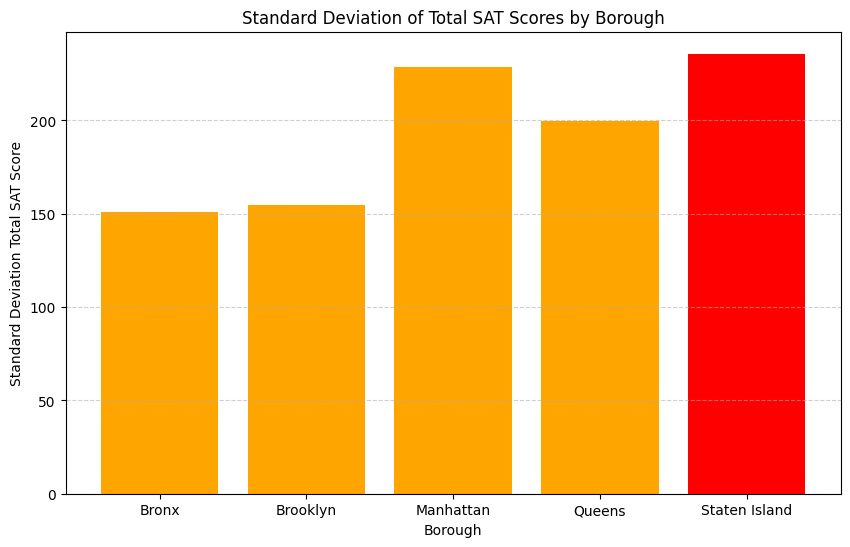

In [19]:
# Group by borough and calculate mean and standard deviation for "total_SAT"
borough_stats = df_schools.groupby('borough')['total_SAT'].agg(['count', 'mean', 'std']).round(2)

# Rename columns for clarity
borough_stats.columns = ['num_schools', 'average_SAT', 'std_SAT']

# Find the borough with the largest standard deviation
largest_std_dev = borough_stats[borough_stats['std_SAT'] == borough_stats['std_SAT'].max()]

# Plotting standard deviation of total SAT scores by borough
plt.figure(figsize=(10, 6))
plt.bar(borough_stats.index, borough_stats['std_SAT'], color='orange')

# Highlight the borough with the largest standard deviation
max_std_borough = largest_std_dev.index[0]
plt.bar(max_std_borough, largest_std_dev['std_SAT'].values[0], color='red')

plt.xlabel('Borough')
plt.ylabel('Standard Deviation Total SAT Score')
plt.title('Standard Deviation of Total SAT Scores by Borough')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()